## Предсказание коэффициента восстановления золота из золотосодержащей руды

### Предварительный импорт библиотек 

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy import stats as st

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import fbeta_score, make_scorer

from sklearn.model_selection import cross_val_score

### 1. Подготовка данных

#### 1.1 Чтение и изучение данных

In [3]:
gold_recovery_full = pd.read_csv("/Users/chugu/Learning DS/Projects/Предсказание восстановления золота из золотосодержащей руды/gold_recovery_full.csv")
gold_recovery_train = pd.read_csv("/Users/chugu/Learning DS/Projects/Предсказание восстановления золота из золотосодержащей руды/gold_recovery_train.csv")
gold_recovery_test = pd.read_csv("/Users/chugu/Learning DS/Projects/Предсказание восстановления золота из золотосодержащей руды/gold_recovery_test.csv")

display(gold_recovery_full.head(), gold_recovery_train.head(), gold_recovery_test.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [4]:
#список используемых датафреймов
data_list = [gold_recovery_full, gold_recovery_train, gold_recovery_test]

In [5]:
#Изучение типов данных
for data in data_list:
    print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


Необходимо преобразовать формат даты в более корректный.

In [6]:
#Анализ пропусков
for data in data_list:
    print(data.isnull().sum())
    print()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.

Данные содержат множество пропусков. Т.к. значения руды схожи с соседними по времени, то следует заменить пропуски на последнее или следующее измерение. Метод будет реализован функциями ffill() и bfill(), которые заменяют NaN на предыдущее и следующее значение соответственно.  

#### 1.2 Проверка расчёта эффективности обогащения
Необходимо проверить, что эффективность обогащения рассчитана правильно. Вычисление будет проведено на обучающей выборке для признака rougher.output.recovery. 

Эффективность процесса отчистки находится по формуле:

Recovery = C*(F-T)/F/(C-T)*100

где:
<ul>
<li>C — доля золота в концентрате после флотации/очистки;
<li>F — доля золота в сырье/концентрате до флотации/очистки;
<li>T — доля золота в отвальных хвостах после флотации/очистки.
</ul>

In [7]:
#Вычисление эффективности на обучающей выборке
C = gold_recovery_train['rougher.output.concentrate_au']
F = gold_recovery_train['rougher.input.feed_au']
T = gold_recovery_train['rougher.output.tail_au']

recovery_verification = pd.DataFrame()
recovery_verification['recovery_calculated'] = C*(F-T)/F/(C-T)*100
recovery_verification['recovery_data'] = gold_recovery_train['rougher.output.recovery']

display(recovery_verification.head())

,recovery_calculated,recovery_data
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


In [8]:
#Вычисление среднего абсолютного отклонения (MAE) между расчётами и значением признака
recovery_mae = ((abs(recovery_verification['recovery_data'] - recovery_verification['recovery_calculated'])).sum())/len(recovery_verification)
print(recovery_mae)

8.908031818449389e-15


Разница между исходным данным показателя и его вычеленным крайне низка, следовательно, данными компании по показателю восстановления можно пользоваться.

#### 1.3 Анализ признаков в разных выборках

In [9]:
#Посик признаков, которых нет в тестовой выборке
A = list(gold_recovery_full)
B = list(gold_recovery_test)

Bset = frozenset(B)
[item for item in A if item not in Bset]

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Признаки включают в себя параметры продукта `output` и концентрацию продукта в отвальных хвостах `tail`. Это целевые признаки, которые должна предсказывать модель.

#### 1.4 Предобработка данных

In [10]:
#замена временного типа данных
def date_time_pd(data, column, date_format):
    data[column] = pd.to_datetime(data[column], format=date_format)

date_time_pd(gold_recovery_full, 'date', '%Y-%m-%dT%H:%M:%S')
date_time_pd(gold_recovery_train, 'date', '%Y-%m-%dT%H:%M:%S')
date_time_pd(gold_recovery_test, 'date', '%Y-%m-%dT%H:%M:%S')

In [11]:
#Обработка пропусков

for data in data_list:
    data = data.ffill(axis=0, limit=50)
    data = data.bfill(axis=0, limit=50)
    data = data.fillna(0)
    data = data.dropna()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 

gold_recovery_full = gold_recovery_full.ffill(axis=0, limit=50)
gold_recovery_full = gold_recovery_full.bfill(axis=0, limit=50)
gold_recovery_full = gold_recovery_full.fillna(0)

gold_recovery_train = gold_recovery_train.ffill(axis=0, limit=50)
gold_recovery_train = gold_recovery_train.bfill(axis=0, limit=50)
gold_recovery_train = gold_recovery_train.fillna(0)

gold_recovery_test = gold_recovery_test.ffill(axis=0, limit=50)
gold_recovery_test = gold_recovery_test.bfill(axis=0, limit=50)
gold_recovery_test = gold_recovery_test.fillna(0)
  
print(gold_recovery_full.isnull().sum())
print(gold_recovery_train.isnull().sum())
print(gold_recovery_test.isnull().sum())

date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au           

Установлено предельное значение замены - пропуски не могут повторяться больше 15 раз как по предыдущим значениям, так и по последующим. Оставшиеся незаполненными пропуски были удалены из-за своей немногочисленности.

### 2 Анализ данных

#### 2.1 Анализ изменения концентрации веществ на различных этапах очистки

In [12]:
#Функция для построения графиков концентрации
def hist_print(data, title, column_set, name_russian_set):    
    plt.subplots(figsize=(10,6), dpi= 100)
    for i, j in zip(column_set, name_russian_set): 
        sns.distplot(data[i], bins=90, label=j)
    plt.grid()    
    plt.xlabel('Концентрация')
    plt.ylabel('Частота')
    plt.title(title, fontsize=20)
    plt.legend()
    plt.show()

In [13]:
#Создание списоков столбцов и подписей для графиков
#Концентрация золота на всех этапах
gold_set = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']

#Концентрация серебра 
silver_set = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']

#Концентрация серебра 
lead_set = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

#Концентрация серебра 
sulfure_set = ['rougher.input.feed_sol', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_sol']

#Список легенды графика
name_concentration_set = ['Сырьё', 'Флотация', 'Первичная обработка', 'Окончательная обработка']

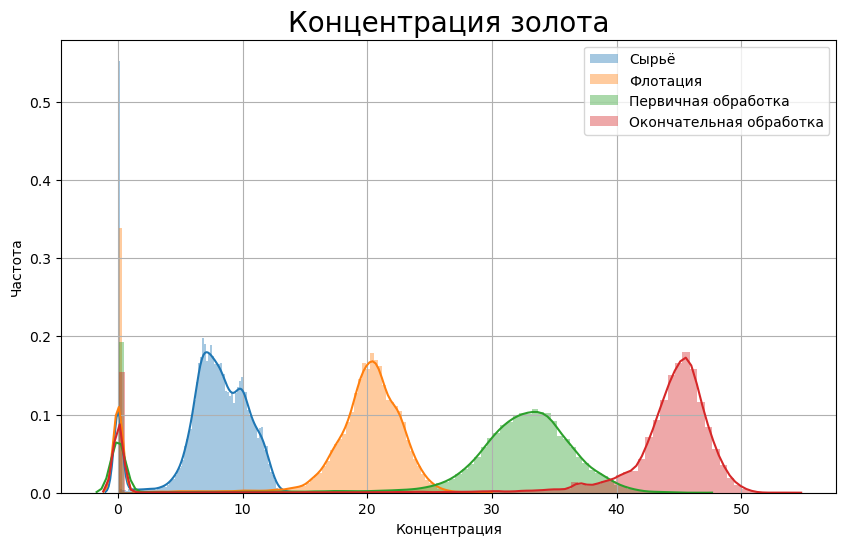

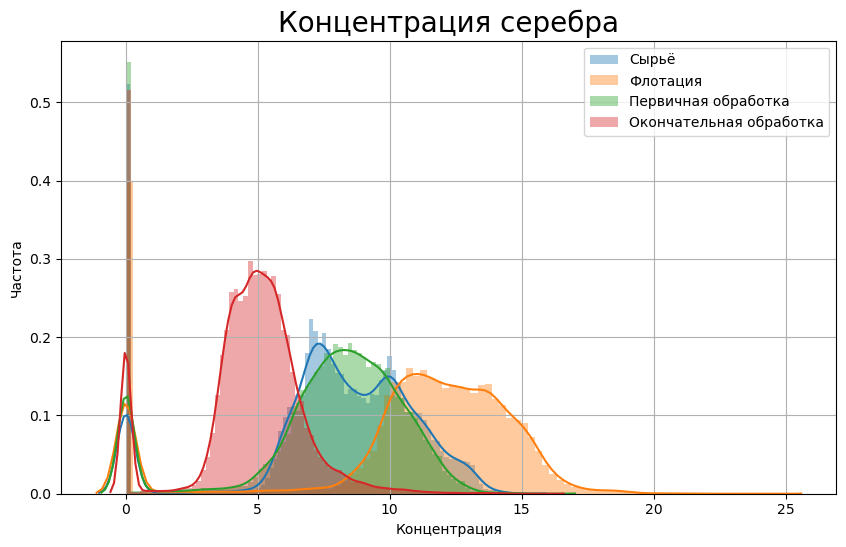

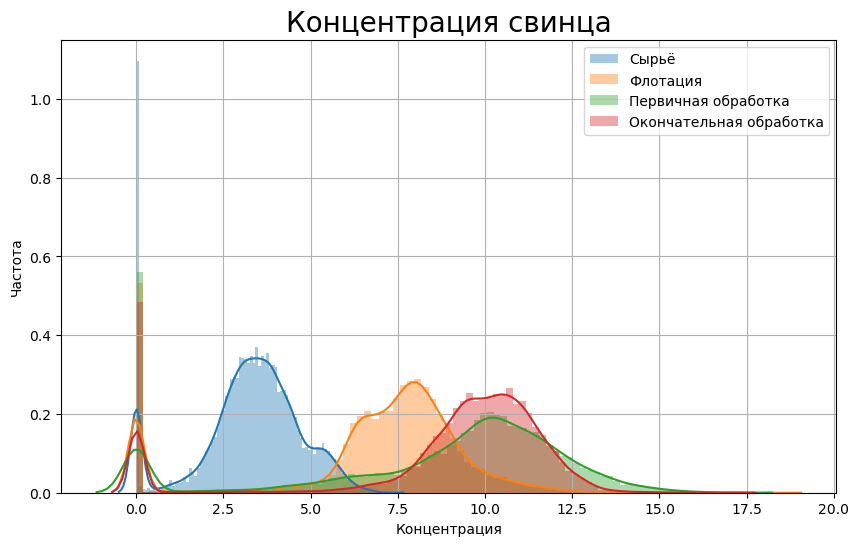

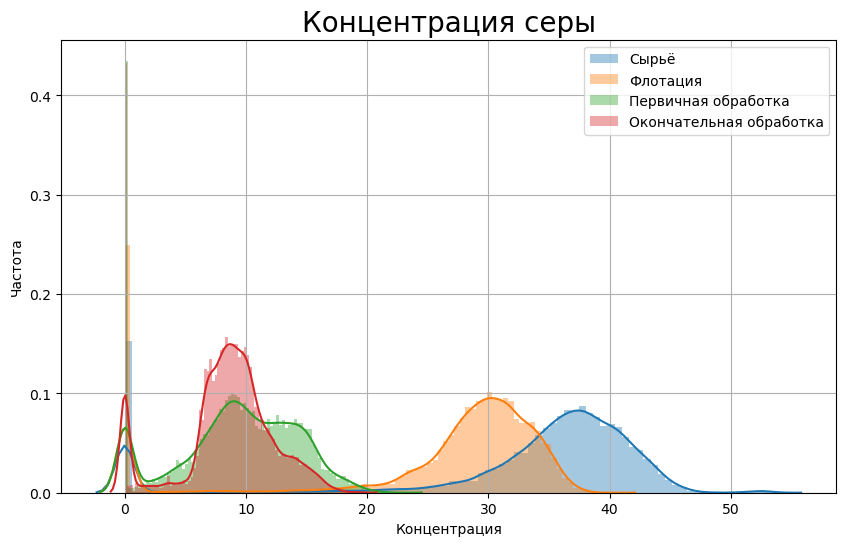

In [14]:
#Построение графиков
hist_print(gold_recovery_full, 'Концентрация золота', gold_set, name_concentration_set) 
hist_print(gold_recovery_full, 'Концентрация серебра', silver_set, name_concentration_set) 
hist_print(gold_recovery_full, 'Концентрация свинца', lead_set, name_concentration_set) 
hist_print(gold_recovery_full, 'Концентрация серы', sulfure_set, name_concentration_set) 

Концентрации золота по мере отчистки увеличивается. Концентрация примесей, особенно серы, уменьшается. У всех данных есть околонулевые выбросы, которые стоит удалить.

#### 2.2  Сравние распределения размеров гранул сырья на обучающей и тестовой выборках

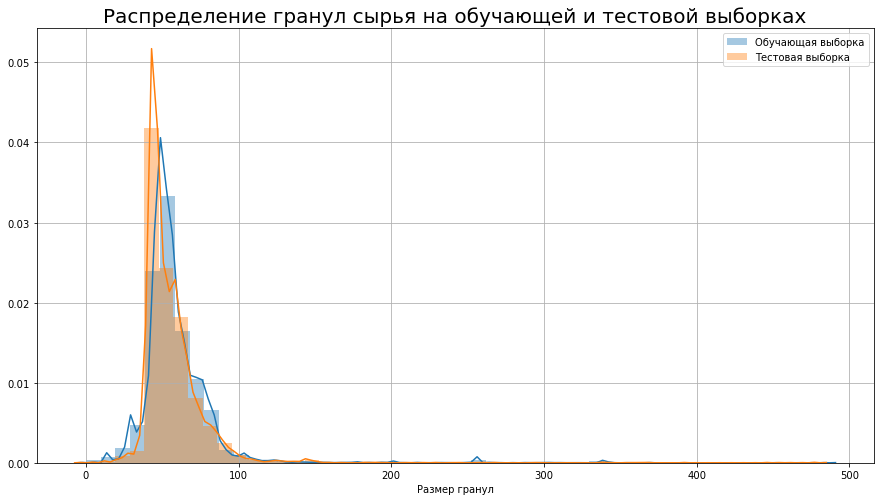

In [15]:
plt.figure(figsize=(15,8))
sns.distplot(gold_recovery_train['rougher.input.feed_size'], label='Обучающая выборка')
sns.distplot(gold_recovery_test['rougher.input.feed_size'], label='Тестовая выборка')
plt.title('Распределение гранул сырья на обучающей и тестовой выборках', fontsize=20)
plt.xlabel('Размер гранул')
plt.grid()
plt.legend()

Размеры гранул схожи на обучающей и тестовой выборках. Если бы они отличались, то оценка модели была бы неправильной. Однако в данных имеются выбросы - около нуля и после 120.

In [16]:
#Посчёт строк до удаления выбросов
string_number_all = len(gold_recovery_train)+len(gold_recovery_test)+len(gold_recovery_full)
print(string_number_all)

45432


In [17]:
#Удаление выбросов в концентрациях веществ
substance_set = gold_set + silver_set + lead_set + sulfure_set #полный список с концентрациями веществ
for i in substance_set:
    gold_recovery_full = gold_recovery_full[(gold_recovery_full[i] > 0.5) & (gold_recovery_full[i] < 80)]
    gold_recovery_train = gold_recovery_train[(gold_recovery_train[i] > 0.5) & (gold_recovery_train[i] < 80)]
    

#Удаление выбросов в размерах гранул
gold_recovery_train = gold_recovery_train[(gold_recovery_train['rougher.input.feed_size'] > 20) & (gold_recovery_train['rougher.input.feed_size'] < 120)]
gold_recovery_test = gold_recovery_test[(gold_recovery_test['rougher.input.feed_size'] > 20) & (gold_recovery_test['rougher.input.feed_size'] < 120)] 

In [18]:
#Подсчёт процента удалённых строк
string_number_clean = len(gold_recovery_train)+len(gold_recovery_test)+len(gold_recovery_full)
string_del_ratio = (1 - string_number_clean/ string_number_all) * 100
print('Процент удалённых строк после чистки выбросов: {:.1f}'.format(string_del_ratio))


Процент удалённых строк после чистки выбросов: 14.3


### Вывод
Аномальные значения были обнаружены на всех графиках. Значения концентраций, как целевого признака, доступны только в обучающей выборке, откуда они и были удалены. Данные о размерах гранул были обработаны для двух выборок, чтобы добиться однородности данных и избежать неправильных оценки и обучения модели на данных, имеющих выбросы.

Процент удалённых строк в результате чистки выбросов оказался невелик, поэтому подготовленными данными можно пользоваться.

### 3. Построение модели

#### 3.1 Функция для вычисления итоговой sMAPE

In [19]:
#Написание функции
def smape(y_test, y_pred):
    target_test = np.array(y_test)
    predicted_test = np.array(y_pred)
    sMAPE = 100/len(target_test) * np.sum(2* np.abs(predicted_test - target_test) / (np.abs(target_test) + np.abs(predicted_test)+0.0001))
    return sMAPE

#для описания качества модели будет использован sMAPE
smape_score = make_scorer(smape, greater_is_better = False) # greater_is_better = False, т.к. при построении модели по умолчанию
                                                            #ищется максимальный параметр качества, а в задаче 
                                                            #необходим минимальный

In [20]:
# Определение функции итогового SMAPE        
def aggregate_smape(rougher, final, model_type):
    aggregate_sMape = 0.25*rougher + 0.75*final
    print(model_type)
    print('Итоговое значение sMAPE: {:.3f}'.format(aggregate_sMape))
    print()
    return aggregate_sMape

#### 3.2 Построение моделей
Будут обучены по две модели - для значений флотации и окончательных параметров руды. Признаки, влияющие на флотацию, не влияют на окончательные параметры (или мультиколлинеарны, что тоже плохо). Тем более окончательные параметры не влияют на предыдущие результаты флотации. Следовательно, необходимо чтобы были разные признаки для каждой отдельной модели для её корректного обучения.

In [21]:
# Создание наборов обучающей и тестовой выборок для предсказания rougher.output.recovery
rougher_columns = gold_recovery_full.loc[:, gold_recovery_train.columns.str.contains('rougher')].columns
 
# Обучающая выборка и ее целевой признак
X_train_rougher = gold_recovery_train[rougher_columns].drop(['rougher.output.recovery'], axis=1)
y_train_rougher = gold_recovery_train[['rougher.output.recovery']]
 
# Тестовая выборка и ее целевой признак
X_test_rougher = gold_recovery_full[rougher_columns].query('index in @gold_recovery_test.index')
X_test_rougher = X_test_rougher.drop(['rougher.output.recovery'], axis=1)
y_test_rougher = gold_recovery_full[['rougher.output.recovery']].query('index in @gold_recovery_test.index')

In [22]:
# Создание наборов обучающей и тестовой выборок для предсказания final.output.recovery
final_columns = gold_recovery_full.loc[:, gold_recovery_train.columns.str.contains('final')].columns
 
# Обучающая выборка и ее целевой признак
X_train_final = gold_recovery_train[final_columns].drop(['final.output.recovery'], axis=1)
y_train_final = gold_recovery_train[['final.output.recovery']]
 
# Тестовая выборка и ее целевой признак
X_test_final = gold_recovery_full[final_columns].query('index in @gold_recovery_test.index')
X_test_final = X_test_final.drop(['final.output.recovery'], axis=1)
y_test_final = gold_recovery_full[['final.output.recovery']].query('index in @gold_recovery_test.index')

#### Линейная регрессия

In [23]:
#функция для построения линейной регрессии
def liner_model(X_train, y_train, X_test, y_test):
    liner_model = LinearRegression()
    liner_model.fit(X_train, y_train)
    predictions_test = liner_model.predict(X_test) 
    smape = abs(cross_val_score(liner_model, X_train, y_train, cv=5, scoring=smape_score).mean())
    
    return liner_model, smape, predictions_test

In [24]:
#Построение моделей линейной регрессии, нахождение итогового sMAPE
liner_model_rougher, line_smape_rougher_val, line_predictions_r = liner_model(X_train_rougher, y_train_rougher, X_test_rougher, y_test_rougher)
liner_model_final, line_smape_final_val, line_predictions_f = liner_model(X_train_final, y_train_final, X_test_final, y_test_final)

liner_smape_agg_val = aggregate_smape(line_smape_rougher_val, line_smape_final_val, 'Линейная регрессия, кросс-валидация')
liner_smape_agg_test = aggregate_smape(smape(y_test_rougher, line_predictions_r), smape(y_test_final, line_predictions_f), 'Линейная регрессия, тестовая выборка')

Линейная регрессия, кросс-валидация
Итоговое значение sMAPE: 6.162

Линейная регрессия, тестовая выборка
Итоговое значение sMAPE: 6.028



#### Модель "Случайный лес"
Для подбора наилучшего соотношения параметров будет использован GrdSearchCV

In [25]:
#Перевод столбцов в строки для подсчёта sMAPE на тестовой выборке
#y_test_final = y_test_final.values.ravel()
#y_test_rougher = y_test_rougher.values.ravel()

In [26]:
def random_forest(X_train, y_train, X_test, y_test):
    random_model = RandomForestRegressor(random_state=12345)
    parametrs = { 'n_estimators': range (2, 10),
                  'max_depth': range (2, 10) }
    rand_grid = GridSearchCV(random_model, parametrs, cv=3, n_jobs=-1, scoring=smape_score)
    rand_grid.fit(X_train, y_train.values.ravel())

    rand_grid.best_params_
    
    smape = abs(cross_val_score(rand_grid, X_train, y_train.values.ravel(), cv=3, scoring=smape_score).mean())
    predictions_test = rand_grid.predict(X_test)
    
    return rand_grid, smape, predictions_test

In [27]:
#Построение моделей случайного леса
random_model_rougher, rand_smape_rougher_val, rand_predictions_r = random_forest(X_train_rougher, y_train_rougher, X_test_rougher, y_test_rougher)
random_model_final, rand_smape_final_val, rand_predictions_f = random_forest(X_train_final, y_train_final, X_test_final, y_test_final)

In [28]:
#Нахождение итогового sMAPE    
rand_smape_agg_val = aggregate_smape(rand_smape_rougher_val, rand_smape_final_val, 'Случайный лес, кросс-валидация')
rand_smape_agg_test = aggregate_smape(smape(y_test_rougher.values.ravel(), rand_predictions_r
                                           ), smape(y_test_final.values.ravel(), rand_predictions_f), 'Случайный лес, тестовая выборка')

Случайный лес, кросс-валидация
Итоговое значение sMAPE: 6.622

Случайный лес, тестовая выборка
Итоговое значение sMAPE: 4.480



Модель случайный лес показала результат на тестовой выборке, чем линейная регрессия. И значительно лучше, чем на валидационной выборке.

#### Сравнение результатов со случайными ответами

In [29]:
from sklearn.dummy import DummyRegressor
dummy_regressor = DummyRegressor()

dummy_regressor.fit(X_train_rougher, y_train_rougher, sample_weight=None)
dummy_predictions_r = dummy_regressor.predict(X_test_rougher)

dummy_regressor.fit(X_train_final, y_train_final, sample_weight=None)
dummy_predictions_f = dummy_regressor.predict(X_test_final)

dummy_smap = aggregate_smape(smape(y_test_rougher.values.ravel(), dummy_predictions_r
                                  ),smape(y_test_final.values.ravel(), dummy_predictions_f), 'Dummy  модель')

Dummy  модель
Итоговое значение sMAPE: 9.667



### 3.3 Вывод
Были обучены две модели - линейная регрессия и случайный лес. Для оценки качества модели был использован критерий sMAPE. У всех моделей значения на тестовой выборке получились лучше, чем на валидационной. Для обучения модели случайного леса был применён Gridsearch, автоматически определяющий оптимальные гиперпараметры модели. Все модели прошли кросс-валидацию.

Модели сравнивались с dummy-моделью, которая является по большей части случайной - выдающей наиболее распространённые ответы. В результате получились такие значения sMAPE на тестовой выборке:

1. Линейная регрессия - 6.028
2. Случайный лес - 4.480
3. Dummy-модель - 9.667

Каждая из обученных моделей показывает результат значительно лучше, чем dummy-модель. Случайный лес справился лучше всего - он качественнее dummy более чем в два раза. Следовательно, для дальнейшего применения рекомендуется использовать именно эту модель.